# 01 - DESCARGA Y ANÁLISIS EXPLORATORIO DE DATOS (EDA)
## Mortalidad por Enfermedades de Alto Costo en Colombia 2019

---

**Objetivo:** Realizar un análisis exploratorio completo del dataset de mortalidad para identificar patrones, distribuciones y relaciones entre variables.

**Dataset:** BD FINAL - Mortalidad 2019 Colombia  
**Registros:** 42,644 defunciones  
**Variables:** 37 columnas

---

## 1. IMPORTACIÓN DE LIBRERÍAS

In [2]:
# Librerías para manipulación de datos
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✓ Librerías importadas correctamente")

Matplotlib is building the font cache; this may take a moment.


✓ Librerías importadas correctamente


## 2. CARGA DEL DATASET

**Descripción del Dataset:**
- Fuente: Datos de mortalidad Colombia 2019
- Hoja: BD FINAL
- Contiene información de defunciones por enfermedades de alto costo

In [4]:
# Cargar dataset
df = pd.read_excel('Mortalidad 2019 colombia1.xlsx', sheet_name='BD FINAL')

print(f"Dataset cargado exitosamente")
print(f"Dimensiones: {df.shape[0]:,} filas x {df.shape[1]} columnas")
print(f"Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset cargado exitosamente
Dimensiones: 42,644 filas x 37 columnas
Memoria utilizada: 30.28 MB


## 3. EXPLORACIÓN INICIAL

### 3.1 Información General del Dataset

In [5]:
# Información general
print("=" * 80)
print("INFORMACIÓN GENERAL DEL DATASET")
print("=" * 80)
df.info()

INFORMACIÓN GENERAL DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42644 entries, 0 to 42643
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   COD_DPTO              42644 non-null  int64  
 1   Nom Dep               42644 non-null  object 
 2   COD_MUNIC             42644 non-null  int64  
 3   A_DEFUN               42644 non-null  int64  
 4   SIT_DEFUN             42644 non-null  int64  
 5   TIPO_DEFUN            42644 non-null  int64  
 6   ANO                   42644 non-null  int64  
 7   MES                   42644 non-null  int64  
 8   HORA                  42644 non-null  int64  
 9   MINUTOS               42644 non-null  int64  
 10  SEXO                  42644 non-null  int64  
 11  EST_CIVIL             42644 non-null  int64  
 12  GRU_ED1               42644 non-null  int64  
 13  GRU_ED2               42644 non-null  int64  
 14  NIVEL_EDU             42644 non-null  

In [6]:
# Vista previa de los datos
print("\nPRIMERAS 5 FILAS DEL DATASET:")
print("=" * 80)
df.head()


PRIMERAS 5 FILAS DEL DATASET:


,COD_DPTO,Nom Dep,COD_MUNIC,A_DEFUN,SIT_DEFUN,TIPO_DEFUN,ANO,MES,HORA,MINUTOS,SEXO,EST_CIVIL,GRU_ED1,GRU_ED2,NIVEL_EDU,ULTCURFAL,MUERTEPORO,SIMUERTEPO,OCUPACION,IDPERTET,CODPRES,CODPTORE,CODMUNRE,AREA_RES,SEG_SOCIAL,IDADMISALUD,P_PMAN_IRIS,CONS_EXP,ASIS_MED,CAUSA_MULT,C_BAS1,NOMBRE CIE-10,CUENTA DE ALTO COSTO,GRUPO,CAUSA_667,IDPROFCER,CAU_HOMOL
0,17,CALDAS,1,1,1,2,2019,12,21,10,1,6,16,4,2,2,2.00,NaN,AGRICULTORES DE CULTIVOS TRANSITORIOS,6,170.00,17.00,50.00,3.00,2,2.00,0,1,1,C712,C712,Tumor maligno del lobulo temporal,Tumor maligno del lobulo temporal,CANCER,214,1,31
1,19,CAUCA,1,1,3,2,2019,12,5,0,2,5,20,5,3,9,2.00,NaN,HOGAR,6,170.00,19.00,1.00,1.00,2,2.00,0,2,2,C719,C719,"Tumor maligno del encefalo, parte no especificada","Tumor maligno del encefalo, parte no especificada",CANCER,214,1,31
2,73,TOLIMA,168,1,1,2,2019,12,23,50,1,6,20,5,2,5,2.00,NaN,HOGAR,6,170.00,73.00,168.00,1.00,2,2.00,0,1,1,I219/I139/I509/N189,N189,"Enfermedad renal cronica, no especificada","INSUFICIENCIA RENAL CRONICA, NO ESPECIFICADA",ER CRONICA,610,1,74
3,23,CÓRDOBA,1,1,1,2,2019,12,12,33,1,4,25,6,2,5,2.00,NaN,OTROS TRABAJADORES DE SERVICIOS PERSONALES A P...,6,170.00,23.00,855.00,3.00,2,2.00,0,1,1,J80/C780 C800*J449,C800,"Tumor maligno, de sitio primario desconocido, ...","Tumor maligno de sitio primario desconocido, a...",CANCER,214,1,34
4,8,ATLÁNTICO,1,1,1,2,2019,11,15,15,1,6,19,5,4,11,2.00,NaN,HOGAR,6,170.00,8.00,421.00,1.00,2,2.00,0,2,1,I461/R570/I313/J90*N185,N185,"Enfermedad renal crónica, etapa 5",ENFERMEDAD RENAL CRÓNICA EN ESTADIO 5,ER CRONICA,610,1,74


### 3.2 Análisis de Valores Nulos

**INTERPRETACIÓN:**  
Identificaremos qué variables tienen valores faltantes para determinar estrategias de imputación.


 ANÁLISIS DE VALORES NULOS:
             Valores_Nulos  Porcentaje
SIMUERTEPO           42609       99.92
IDADMISALUD           1026        2.41
OCUPACION              311        0.73
MUERTEPORO             165        0.39
CODMUNRE               151        0.35
CODPTORE               151        0.35
AREA_RES               150        0.35
CODPRES                  9        0.02


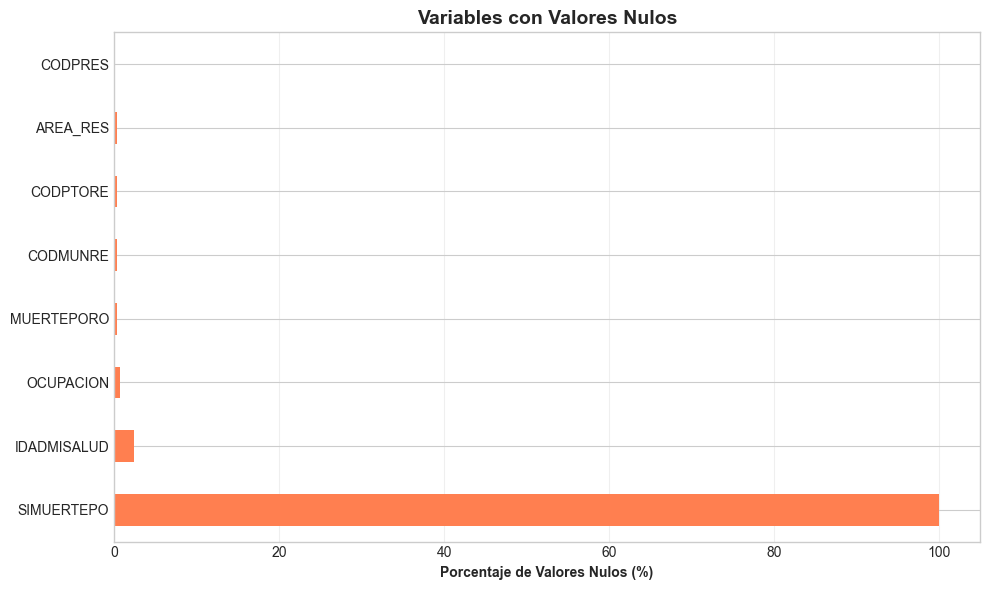


 INTERPRETACIÓN:
- SIMUERTEPO tiene 99.92% de valores nulos → ELIMINAR esta variable
- IDADMISALUD tiene 2.41% de valores nulos → Imputar o eliminar según análisis
- Otras variables tienen < 1% de nulos → Imputación simple


In [8]:
# Análisis de valores nulos
nulos = df.isnull().sum()
porcentaje_nulos = (df.isnull().sum() / len(df) * 100).round(2)

resumen_nulos = pd.DataFrame({
    'Valores_Nulos': nulos,
    'Porcentaje': porcentaje_nulos
}).sort_values('Porcentaje', ascending=False)

print("\n ANÁLISIS DE VALORES NULOS:")
print("=" * 80)
print(resumen_nulos[resumen_nulos['Valores_Nulos'] > 0])

# Visualización
fig, ax = plt.subplots(figsize=(10, 6))
variables_con_nulos = resumen_nulos[resumen_nulos['Valores_Nulos'] > 0].head(10)
variables_con_nulos['Porcentaje'].plot(kind='barh', ax=ax, color='coral')
ax.set_xlabel('Porcentaje de Valores Nulos (%)', fontweight='bold')
ax.set_title('Variables con Valores Nulos', fontweight='bold', fontsize=14)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n INTERPRETACIÓN:")
print("- SIMUERTEPO tiene 99.92% de valores nulos → ELIMINAR esta variable")
print("- IDADMISALUD tiene 2.41% de valores nulos → Imputar o eliminar según análisis")
print("- Otras variables tienen < 1% de nulos → Imputación simple")

## 4. ANÁLISIS DE LA VARIABLE OBJETIVO: GRUPO

**Variable objetivo:** `GRUPO` - Categoría de enfermedad de alto costo  
**Categorías:**
- CANCER
- ER CRONICA (Enfermedad Renal Crónica)
- VIH (Virus de Inmunodeficiencia Humana)
- HEMOFILIA

In [11]:
print("\n DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (GRUPO):")
print("=" * 80)
grupo_counts = df['GRUPO'].value_counts()
grupo_pct = (df['GRUPO'].value_counts(normalize=True) * 100).round(2)

resumen_grupo = pd.DataFrame({
    'Frecuencia': grupo_counts,
    'Porcentaje': grupo_pct
})
print(resumen_grupo)

print("\n INTERPRETACIÓN:")
print(f"- CANCER domina con {grupo_pct['CANCER']}% de los casos")
print(f"- ER CRONICA representa {grupo_pct['ER CRONICA']}% de los casos")
print(f"- VIH representa {grupo_pct['VIH']}% de los casos")
print(f"- HEMOFILIA es la categoría minoritaria con {grupo_pct['HEMOFILIA ']}%")
print("\n  DESBALANCE DE CLASES SIGNIFICATIVO")
print("   → Será necesario aplicar técnicas de balanceo (SMOTE, undersampling)")
print("   → Usar métricas balanceadas (F1-Score, Recall por clase)")


 DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (GRUPO):
            Frecuencia  Porcentaje
GRUPO                             
CANCER           38028       89.18
ER CRONICA        2584        6.06
VIH               1937        4.54
HEMOFILIA           95        0.22

 INTERPRETACIÓN:
- CANCER domina con 89.18% de los casos
- ER CRONICA representa 6.06% de los casos
- VIH representa 4.54% de los casos
- HEMOFILIA es la categoría minoritaria con 0.22%

  DESBALANCE DE CLASES SIGNIFICATIVO
   → Será necesario aplicar técnicas de balanceo (SMOTE, undersampling)
   → Usar métricas balanceadas (F1-Score, Recall por clase)


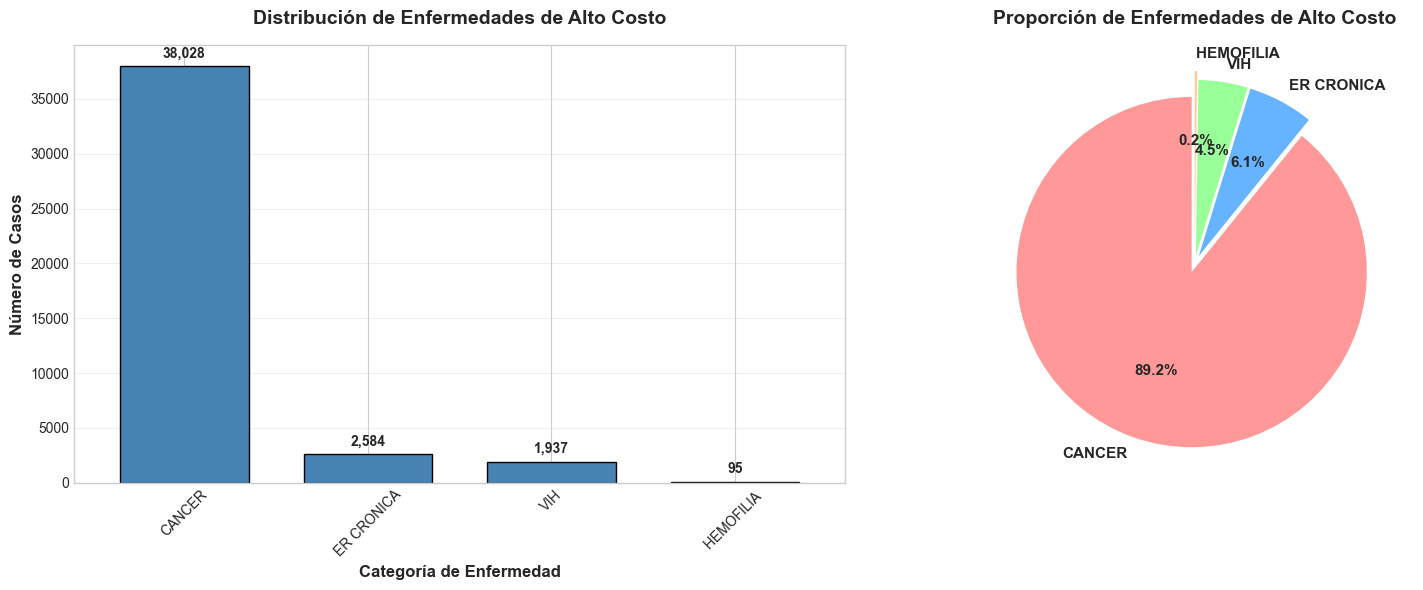

In [12]:
# Visualización de la distribución del GRUPO
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras
grupo_counts.plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black', width=0.7)
axes[0].set_title('Distribución de Enfermedades de Alto Costo', fontweight='bold', fontsize=14, pad=15)
axes[0].set_xlabel('Categoría de Enfermedad', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Número de Casos', fontweight='bold', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Agregar valores sobre las barras
for i, v in enumerate(grupo_counts):
    axes[0].text(i, v + 500, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Gráfico de pastel
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
explode = (0.05, 0.05, 0.05, 0.1)
grupo_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90, 
                   colors=colors, explode=explode, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Proporción de Enfermedades de Alto Costo', fontweight='bold', fontsize=14, pad=15)
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

## 5. ANÁLISIS DE VARIABLES DEMOGRÁFICAS

### 5.1 Análisis por Sexo

In [14]:
# Mapeo de valores de SEXO
sexo_map = {1: 'Hombre', 2: 'Mujer'}
df['SEXO_DESC'] = df['SEXO'].map(sexo_map)

print("\n DISTRIBUCIÓN POR SEXO:")
print("=" * 80)
print(df['SEXO_DESC'].value_counts())
print("\nPorcentajes:")
print((df['SEXO_DESC'].value_counts(normalize=True) * 100).round(2))

# Distribución de GRUPO por SEXO
print("\n DISTRIBUCIÓN DE ENFERMEDADES POR SEXO:")
print("=" * 80)
tabla_sexo_grupo = pd.crosstab(df['SEXO_DESC'], df['GRUPO'], margins=True)
print(tabla_sexo_grupo)

print("\n INTERPRETACIÓN:")
print("- Distribución casi equitativa entre hombres y mujeres")
print("- Algunas enfermedades pueden tener predisposición por sexo")
print("  (ej: cáncer de mama más frecuente en mujeres)")


 DISTRIBUCIÓN POR SEXO:
SEXO_DESC
Mujer     21889
Hombre    20755
Name: count, dtype: int64

Porcentajes:
SEXO_DESC
Mujer    51.33
Hombre   48.67
Name: proportion, dtype: float64

 DISTRIBUCIÓN DE ENFERMEDADES POR SEXO:
GRUPO      CANCER  ER CRONICA  HEMOFILIA    VIH    All
SEXO_DESC                                             
Hombre      17669        1514          53  1519  20755
Mujer       20359        1070          42   418  21889
All         38028        2584          95  1937  42644

 INTERPRETACIÓN:
- Distribución casi equitativa entre hombres y mujeres
- Algunas enfermedades pueden tener predisposición por sexo
  (ej: cáncer de mama más frecuente en mujeres)


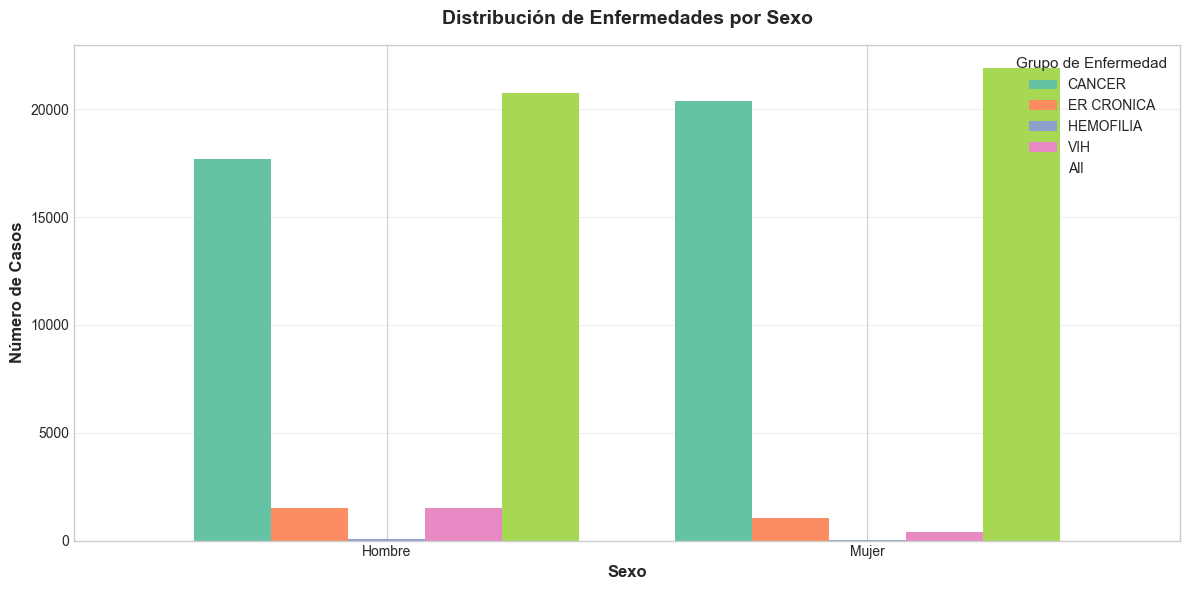

In [15]:
# Visualización: GRUPO por SEXO
fig, ax = plt.subplots(figsize=(12, 6))
tabla_sexo_grupo.drop('All').plot(kind='bar', ax=ax, width=0.8)
ax.set_title('Distribución de Enfermedades por Sexo', fontweight='bold', fontsize=14, pad=15)
ax.set_xlabel('Sexo', fontweight='bold', fontsize=12)
ax.set_ylabel('Número de Casos', fontweight='bold', fontsize=12)
ax.legend(title='Grupo de Enfermedad', title_fontsize=11, fontsize=10)
ax.tick_params(axis='x', rotation=0)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 5.2 Análisis por Grupo de Edad

**Variables de edad:**
- `GRU_ED1`: Grupos quinquenales de edad (0-4, 5-9, ..., 95-99 años)
- `GRU_ED2`: Grupos amplios de edad (1-6)

In [17]:
# Análisis de grupos de edad
print("\n DISTRIBUCIÓN POR GRUPOS DE EDAD (GRU_ED2):")
print("=" * 80)
# Mapeo de GRU_ED2
edad_map = {
    1: '< 1 año',
    2: '1-4 años',
    3: '5-14 años',
    4: '15-44 años',
    5: '45-64 años',
    6: '65+ años'
}
df['GRUPO_EDAD_DESC'] = df['GRU_ED2'].map(edad_map)

print(df['GRUPO_EDAD_DESC'].value_counts().sort_index())

print("\n INTERPRETACIÓN:")
print("- La mayoría de muertes por enfermedades de alto costo ocurren en personas de 65+ años")
print("- Segundo grupo más afectado: 45-64 años")
print("- Refleja que estas son enfermedades crónicas asociadas al envejecimiento")


 DISTRIBUCIÓN POR GRUPOS DE EDAD (GRU_ED2):
GRUPO_EDAD_DESC
1-4 años        134
15-44 años     4975
45-64 años    12704
5-14 años       328
65+ años      24472
< 1 año          31
Name: count, dtype: int64

 INTERPRETACIÓN:
- La mayoría de muertes por enfermedades de alto costo ocurren en personas de 65+ años
- Segundo grupo más afectado: 45-64 años
- Refleja que estas son enfermedades crónicas asociadas al envejecimiento


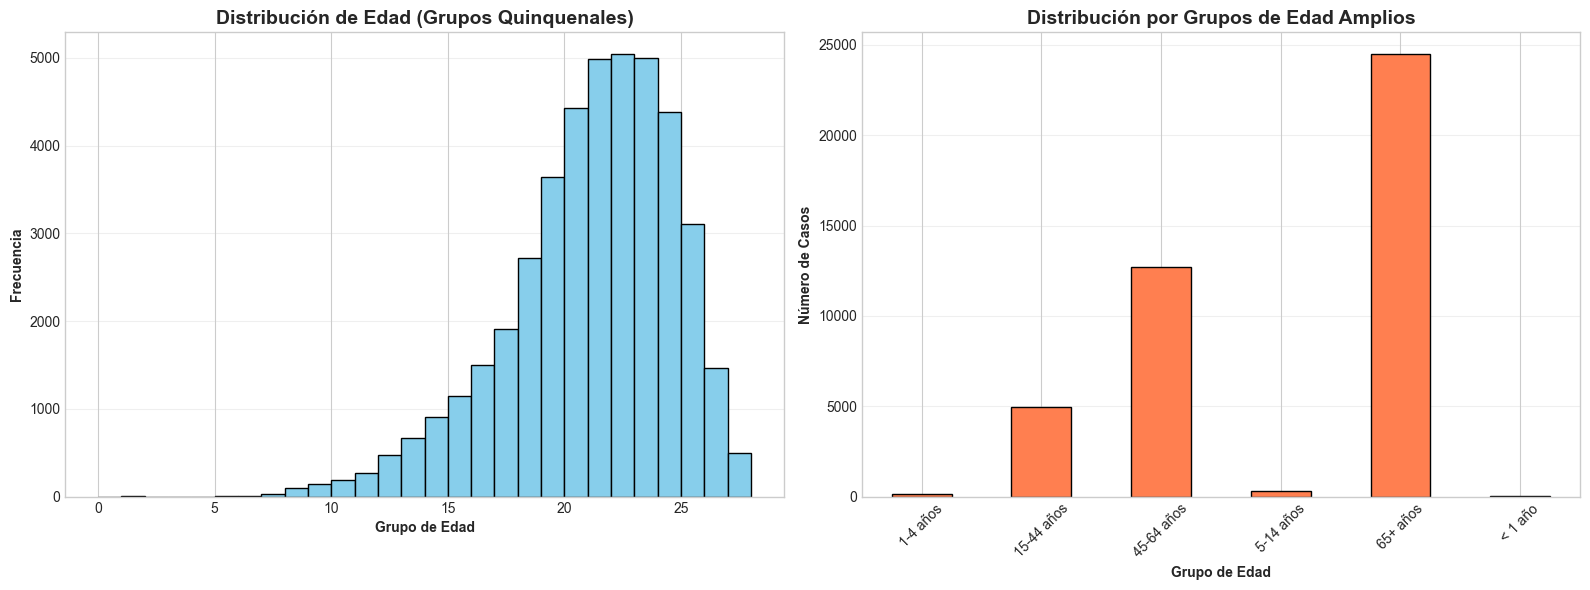

In [18]:
# Visualización: Distribución de edad
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma de GRU_ED1
df['GRU_ED1'].hist(bins=28, ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Distribución de Edad (Grupos Quinquenales)', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Grupo de Edad', fontweight='bold')
axes[0].set_ylabel('Frecuencia', fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Gráfico de barras GRU_ED2
df['GRUPO_EDAD_DESC'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color='coral', edgecolor='black')
axes[1].set_title('Distribución por Grupos de Edad Amplios', fontweight='bold', fontsize=14)
axes[1].set_xlabel('Grupo de Edad', fontweight='bold')
axes[1].set_ylabel('Número de Casos', fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 5.3 Análisis por Departamento

**Variable:** `Nom Dep` - Departamento de residencia


  DISTRIBUCIÓN POR DEPARTAMENTO (Top 15):
Nom Dep
BOGOTÁ, D.C.          8607
ANTIOQUIA             6862
VALLE DEL CAUCA       5064
ATLÁNTICO             2688
SANTANDER             2138
CUNDINAMARCA          1381
RISARALDA             1356
NORTE DE SANTANDER    1337
BOLÍVAR               1313
NARIÑO                1172
TOLIMA                1151
CALDAS                1121
CÓRDOBA               1090
HUILA                 1056
CAUCA                  827
Name: count, dtype: int64

 INTERPRETACIÓN:
- Bogotá D.C. lidera con el mayor número de casos
- Antioquia y Valle del Cauca completan el top 3
- Correlación con población y desarrollo de servicios de salud


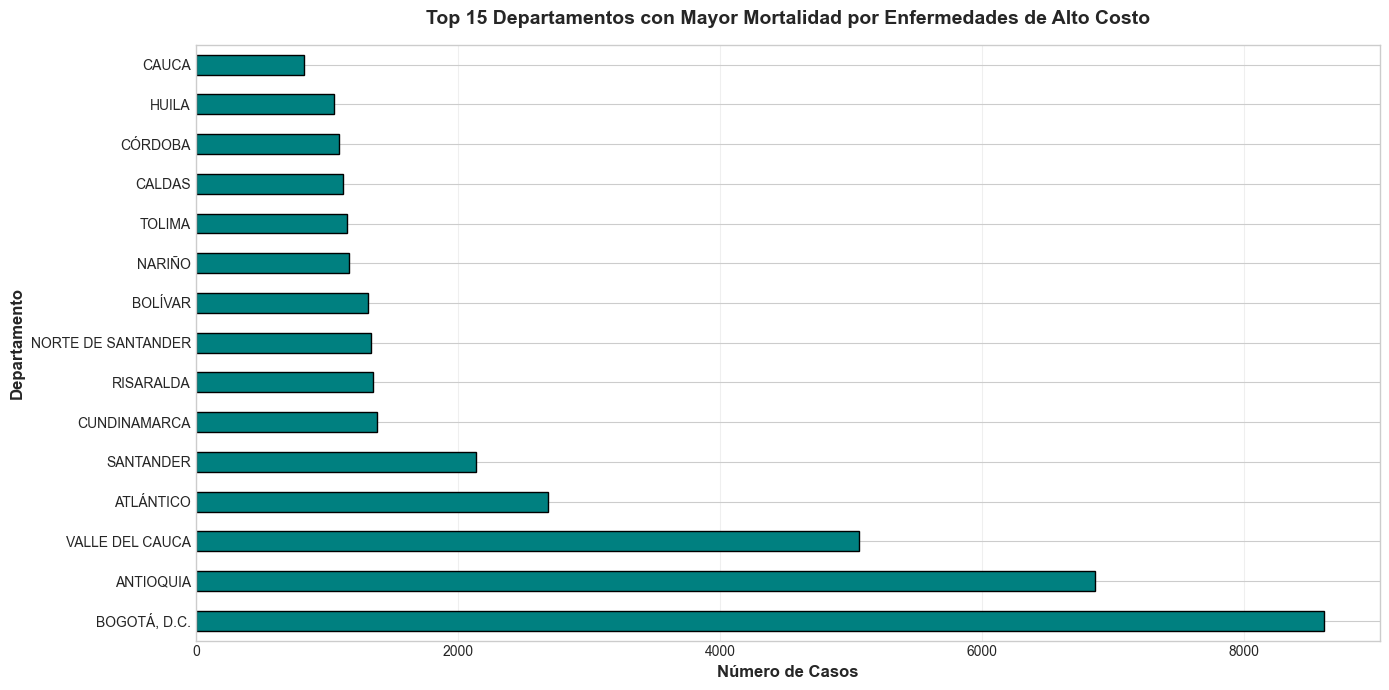

In [19]:
print("\n  DISTRIBUCIÓN POR DEPARTAMENTO (Top 15):")
print("=" * 80)
top_deptos = df['Nom Dep'].value_counts().head(15)
print(top_deptos)

print("\n INTERPRETACIÓN:")
print("- Bogotá D.C. lidera con el mayor número de casos")
print("- Antioquia y Valle del Cauca completan el top 3")
print("- Correlación con población y desarrollo de servicios de salud")

# Visualización
fig, ax = plt.subplots(figsize=(14, 7))
top_deptos.plot(kind='barh', ax=ax, color='teal', edgecolor='black')
ax.set_title('Top 15 Departamentos con Mayor Mortalidad por Enfermedades de Alto Costo', 
             fontweight='bold', fontsize=14, pad=15)
ax.set_xlabel('Número de Casos', fontweight='bold', fontsize=12)
ax.set_ylabel('Departamento', fontweight='bold', fontsize=12)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### 5.4 Análisis por Seguridad Social

**Variable:** `SEG_SOCIAL` - Tipo de seguridad social


 DISTRIBUCIÓN POR RÉGIMEN DE SEGURIDAD SOCIAL:
SEG_SOCIAL_DESC
Subsidiado         20688
Contributivo       18882
Especial            1869
No asegurado        1026
Excepción            152
No especificado       27
Name: count, dtype: int64

Porcentajes:
SEG_SOCIAL_DESC
Subsidiado        48.51
Contributivo      44.28
Especial           4.38
No asegurado       2.41
Excepción          0.36
No especificado    0.06
Name: proportion, dtype: float64

 INTERPRETACIÓN:
- Régimen Subsidiado: 48.5% de los casos
- Régimen Contributivo: 44.3% de los casos
- Refleja cobertura del sistema de salud colombiano


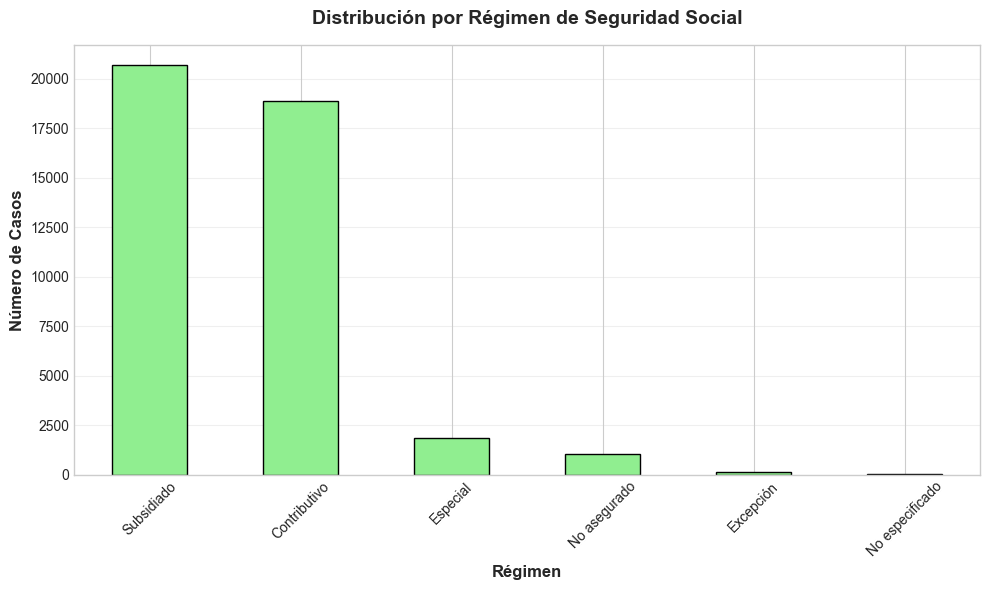

In [20]:
# Mapeo de seguridad social
seg_social_map = {
    1: 'Contributivo',
    2: 'Subsidiado',
    3: 'Especial',
    4: 'Excepción',
    5: 'No asegurado',
    9: 'No especificado'
}
df['SEG_SOCIAL_DESC'] = df['SEG_SOCIAL'].map(seg_social_map)

print("\n DISTRIBUCIÓN POR RÉGIMEN DE SEGURIDAD SOCIAL:")
print("=" * 80)
print(df['SEG_SOCIAL_DESC'].value_counts())
print("\nPorcentajes:")
print((df['SEG_SOCIAL_DESC'].value_counts(normalize=True) * 100).round(2))

print("\n INTERPRETACIÓN:")
print("- Régimen Subsidiado: 48.5% de los casos")
print("- Régimen Contributivo: 44.3% de los casos")
print("- Refleja cobertura del sistema de salud colombiano")

# Visualización
fig, ax = plt.subplots(figsize=(10, 6))
df['SEG_SOCIAL_DESC'].value_counts().plot(kind='bar', ax=ax, color='lightgreen', edgecolor='black')
ax.set_title('Distribución por Régimen de Seguridad Social', fontweight='bold', fontsize=14, pad=15)
ax.set_xlabel('Régimen', fontweight='bold', fontsize=12)
ax.set_ylabel('Número de Casos', fontweight='bold', fontsize=12)
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 6. ANÁLISIS TEMPORAL

### 6.1 Distribución por Mes del Año


 DISTRIBUCIÓN DE MUERTES POR MES:
MES_DESC
Abril         3563
Agosto        3644
Diciembre     3677
Enero         3617
Febrero       3389
Julio         3629
Junio         3561
Marzo         3590
Mayo          3527
Noviembre     3471
Octubre       3602
Septiembre    3374
Name: count, dtype: int64


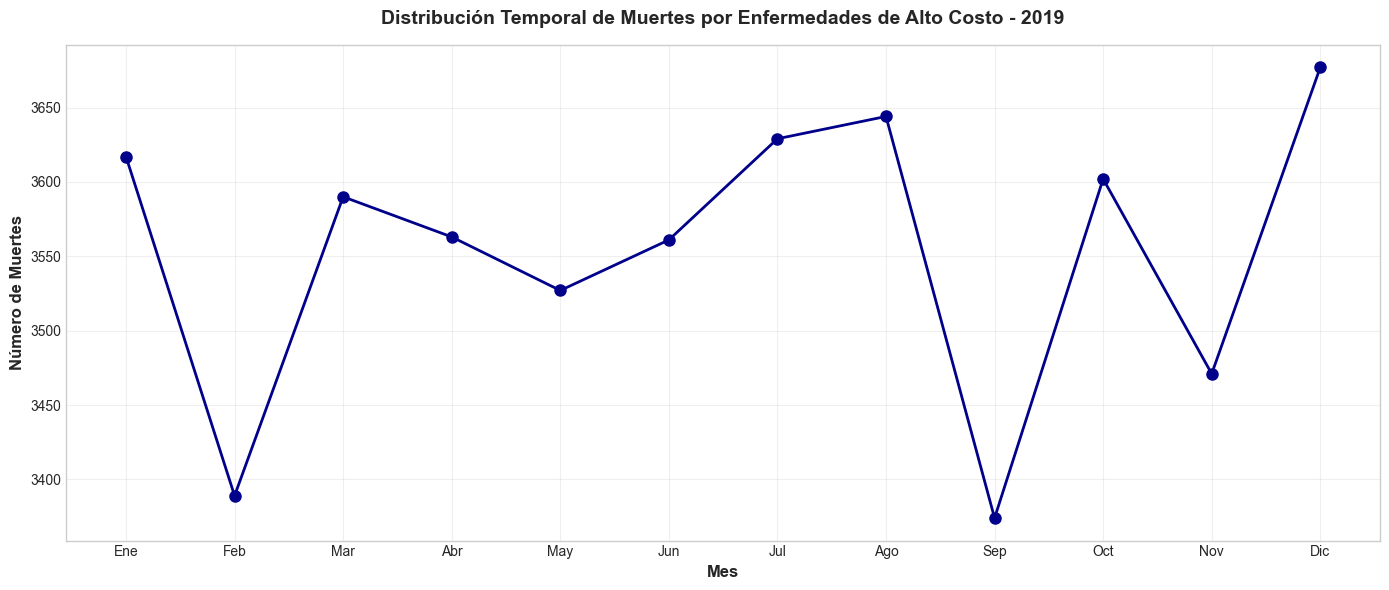


 INTERPRETACIÓN:
- Variación mensual en el número de muertes
- Puede reflejar estacionalidad en el diagnóstico o agravamiento de enfermedades


In [21]:
# Análisis mensual
meses = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}
df['MES_DESC'] = df['MES'].map(meses)

print("\n DISTRIBUCIÓN DE MUERTES POR MES:")
print("=" * 80)
mes_counts = df['MES_DESC'].value_counts().sort_index()
print(mes_counts)

# Visualización
fig, ax = plt.subplots(figsize=(14, 6))
df.groupby('MES').size().plot(kind='line', ax=ax, marker='o', linewidth=2, markersize=8, color='darkblue')
ax.set_title('Distribución Temporal de Muertes por Enfermedades de Alto Costo - 2019', 
             fontweight='bold', fontsize=14, pad=15)
ax.set_xlabel('Mes', fontweight='bold', fontsize=12)
ax.set_ylabel('Número de Muertes', fontweight='bold', fontsize=12)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n INTERPRETACIÓN:")
print("- Variación mensual en el número de muertes")
print("- Puede reflejar estacionalidad en el diagnóstico o agravamiento de enfermedades")

## 7. ANÁLISIS DE ENFERMEDADES ESPECÍFICAS

### 7.1 Top 20 Enfermedades más Frecuentes


 TOP 20 ENFERMEDADES DE ALTO COSTO MÁS FRECUENTES:
CUENTA DE ALTO COSTO
Tumor maligno del estomago, parte no especificada                                  5125
Tumor maligno de los bronquios o del pulmon, parte no especificada                 4438
Tumor maligno de la mama, parte no especificada                                    3619
Tumor maligno del colon, parte no especificada                                     2762
INSUFICIENCIA RENAL CRONICA, NO ESPECIFICADA                                       1917
Tumor maligno sitio primario no especificado                                       1711
Tumor maligno del cuello del utero, sin otra especificacion                        1678
Tumor maligno del pancreas, parte no especificada                                  1617
Tumor maligno del higado, no especificado                                           947
Linfoma no hodgkin, no especificado                                                 793
Mieloma multiple                               

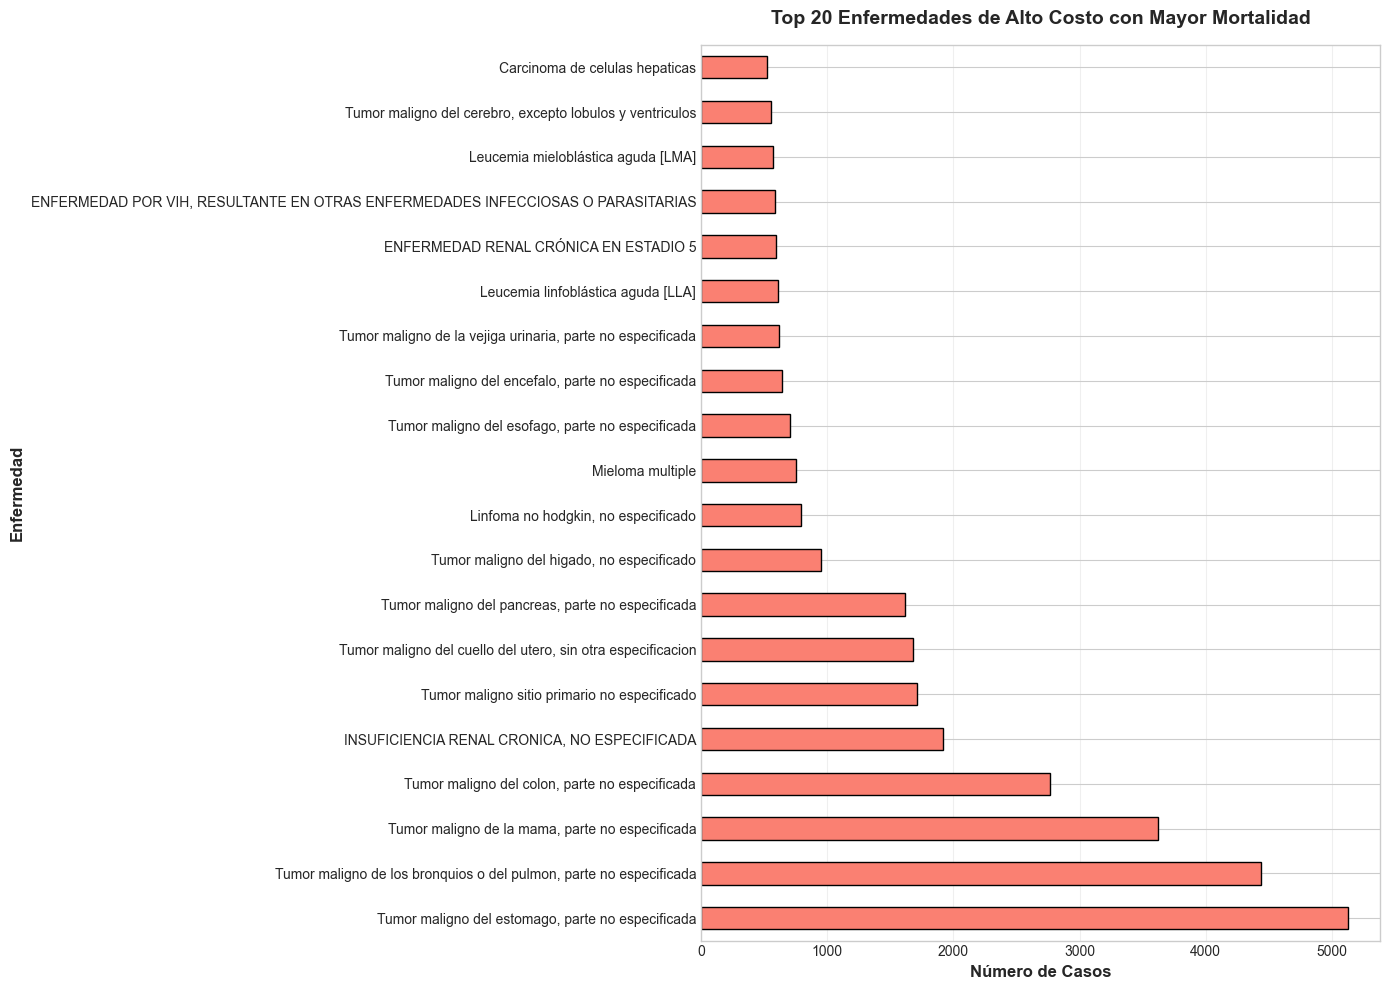


 INTERPRETACIÓN:
- Tumor maligno del estómago lidera con 5,125 casos
- Tumores malignos de pulmón y mama en segundo y tercer lugar
- Predominan cánceres del sistema digestivo y respiratorio


In [22]:
print("\n TOP 20 ENFERMEDADES DE ALTO COSTO MÁS FRECUENTES:")
print("=" * 80)
top_enfermedades = df['CUENTA DE ALTO COSTO'].value_counts().head(20)
print(top_enfermedades)

# Visualización
fig, ax = plt.subplots(figsize=(14, 10))
top_enfermedades.plot(kind='barh', ax=ax, color='salmon', edgecolor='black')
ax.set_title('Top 20 Enfermedades de Alto Costo con Mayor Mortalidad', 
             fontweight='bold', fontsize=14, pad=15)
ax.set_xlabel('Número de Casos', fontweight='bold', fontsize=12)
ax.set_ylabel('Enfermedad', fontweight='bold', fontsize=12)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n INTERPRETACIÓN:")
print("- Tumor maligno del estómago lidera con 5,125 casos")
print("- Tumores malignos de pulmón y mama en segundo y tercer lugar")
print("- Predominan cánceres del sistema digestivo y respiratorio")

### 7.2 Análisis de Códigos CIE-10 más Frecuentes


 TOP 20 CÓDIGOS CIE-10 MÁS FRECUENTES:
C_BAS1
C169    5125
C349    4438
C509    3619
C189    2762
N189    1917
C809    1711
C539    1678
C259    1617
C229     947
C859     793
C900     756
C159     707
C719     645
C679     614
C910     611
N185     598
B208     584
C920     572
C710     552
C220     520
Name: count, dtype: int64


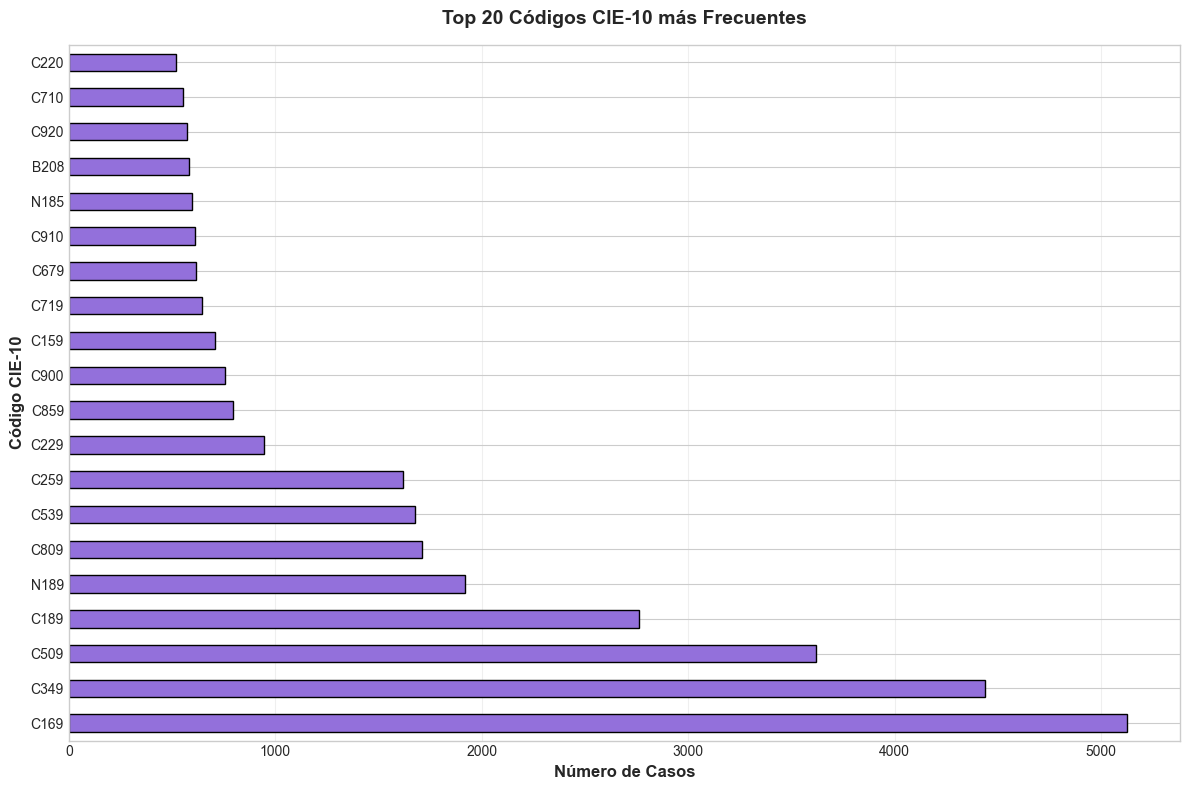

In [23]:
print("\n TOP 20 CÓDIGOS CIE-10 MÁS FRECUENTES:")
print("=" * 80)
top_cie10 = df['C_BAS1'].value_counts().head(20)
print(top_cie10)

# Visualización
fig, ax = plt.subplots(figsize=(12, 8))
top_cie10.plot(kind='barh', ax=ax, color='mediumpurple', edgecolor='black')
ax.set_title('Top 20 Códigos CIE-10 más Frecuentes', fontweight='bold', fontsize=14, pad=15)
ax.set_xlabel('Número de Casos', fontweight='bold', fontsize=12)
ax.set_ylabel('Código CIE-10', fontweight='bold', fontsize=12)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 8. ANÁLISIS BIVARIADO

### 8.1 Relación entre GRUPO y SEXO


 DISTRIBUCIÓN PORCENTUAL DE SEXO POR GRUPO DE ENFERMEDAD:
SEXO_DESC   Hombre  Mujer
GRUPO                    
CANCER       46.46  53.54
ER CRONICA   58.59  41.41
HEMOFILIA    55.79  44.21
VIH          78.42  21.58


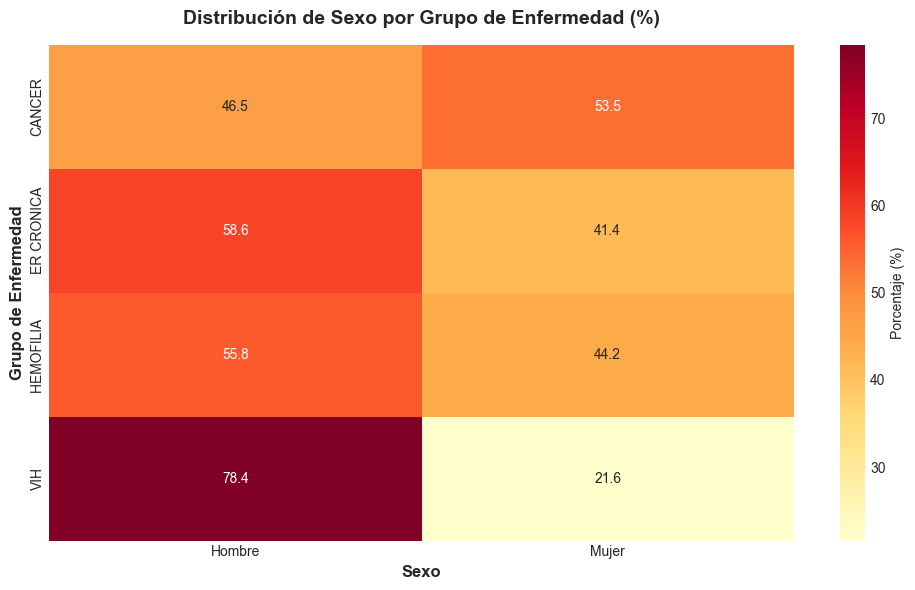


 INTERPRETACIÓN:
- Distribución relativamente equitativa entre sexos en la mayoría de grupos
- Posibles diferencias en tipos específicos de cáncer


In [25]:
# Tabla cruzada con porcentajes
tabla_grupo_sexo = pd.crosstab(df['GRUPO'], df['SEXO_DESC'], normalize='index') * 100
print("\n DISTRIBUCIÓN PORCENTUAL DE SEXO POR GRUPO DE ENFERMEDAD:")
print("=" * 80)
print(tabla_grupo_sexo.round(2))

# Visualización: Heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(tabla_grupo_sexo, annot=True, fmt='.1f', cmap='YlOrRd', ax=ax, 
            cbar_kws={'label': 'Porcentaje (%)'})
ax.set_title('Distribución de Sexo por Grupo de Enfermedad (%)', fontweight='bold', fontsize=14, pad=15)
ax.set_xlabel('Sexo', fontweight='bold', fontsize=12)
ax.set_ylabel('Grupo de Enfermedad', fontweight='bold', fontsize=12)
plt.tight_layout()
plt.show()

print("\n INTERPRETACIÓN:")
print("- Distribución relativamente equitativa entre sexos en la mayoría de grupos")
print("- Posibles diferencias en tipos específicos de cáncer")

### 8.2 Relación entre GRUPO y GRUPO DE EDAD


 DISTRIBUCIÓN DE EDAD POR GRUPO DE ENFERMEDAD:
GRUPO_EDAD_DESC  1-4 años  15-44 años  45-64 años  5-14 años  65+ años  \
GRUPO                                                                    
CANCER                128        3672       11566        323     22321   
ER CRONICA              3         134         483          3      1951   
HEMOFILIA               1          13          21          0        59   
VIH                     2        1156         634          2       141   

GRUPO_EDAD_DESC  < 1 año  
GRUPO                     
CANCER                18  
ER CRONICA            10  
HEMOFILIA              1  
VIH                    2  


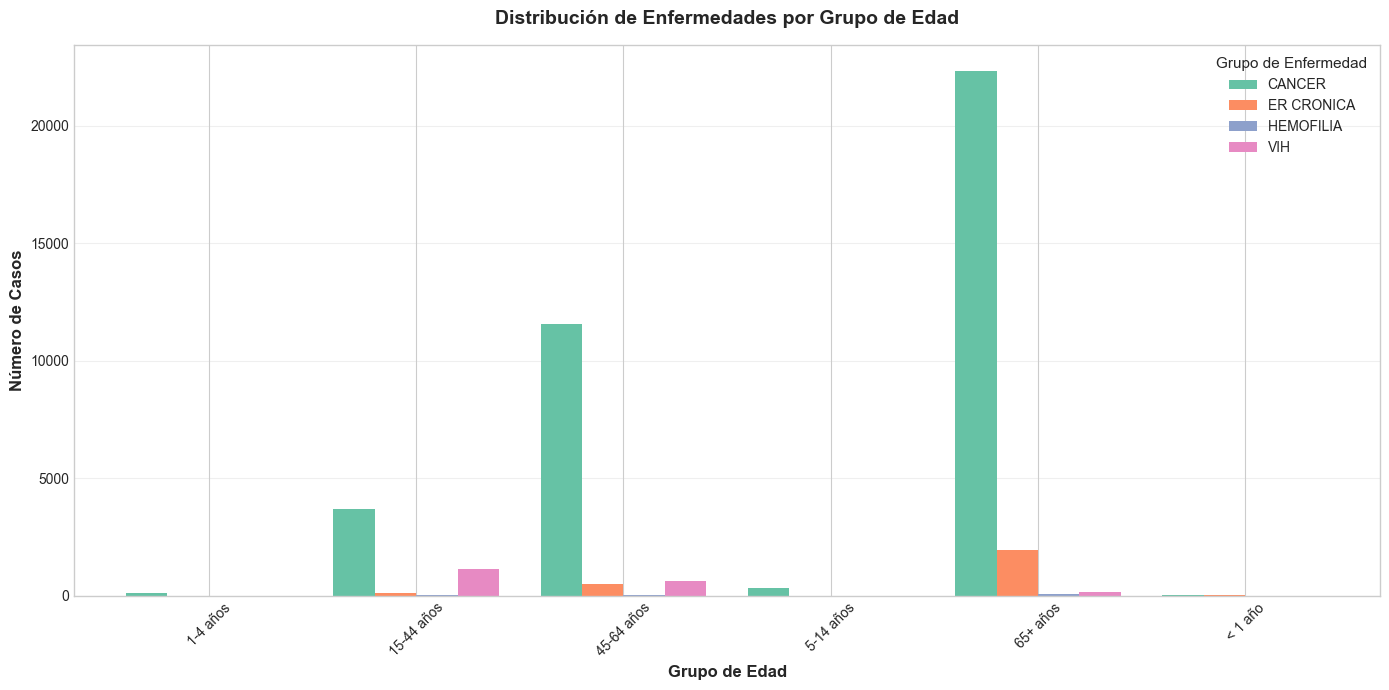


 INTERPRETACIÓN:
- El cáncer es predominante en todos los grupos de edad, especialmente en adultos mayores
- VIH tiene mayor incidencia en grupos de edad más jóvenes (15-44, 45-64 años)
- Enfermedad Renal Crónica es más común en adultos mayores (65+ años)


In [26]:
# Tabla cruzada
tabla_grupo_edad = pd.crosstab(df['GRUPO'], df['GRUPO_EDAD_DESC'])
print("\n DISTRIBUCIÓN DE EDAD POR GRUPO DE ENFERMEDAD:")
print("=" * 80)
print(tabla_grupo_edad)

# Visualización: Gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(14, 7))
tabla_grupo_edad.T.plot(kind='bar', ax=ax, width=0.8, stacked=False)
ax.set_title('Distribución de Enfermedades por Grupo de Edad', fontweight='bold', fontsize=14, pad=15)
ax.set_xlabel('Grupo de Edad', fontweight='bold', fontsize=12)
ax.set_ylabel('Número de Casos', fontweight='bold', fontsize=12)
ax.legend(title='Grupo de Enfermedad', title_fontsize=11, fontsize=10)
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n INTERPRETACIÓN:")
print("- El cáncer es predominante en todos los grupos de edad, especialmente en adultos mayores")
print("- VIH tiene mayor incidencia en grupos de edad más jóvenes (15-44, 45-64 años)")
print("- Enfermedad Renal Crónica es más común en adultos mayores (65+ años)")

### 8.3 Relación entre GRUPO y DEPARTAMENTO


  DISTRIBUCIÓN GEOGRÁFICA POR GRUPO DE ENFERMEDAD:

CANCER:
Nom Dep
BOGOTÁ, D.C.       7925
ANTIOQUIA          6271
VALLE DEL CAUCA    4463
ATLÁNTICO          2338
SANTANDER          1957
Name: count, dtype: int64

ER CRONICA:
Nom Dep
BOGOTÁ, D.C.       337
ANTIOQUIA          316
VALLE DEL CAUCA    285
ATLÁNTICO          199
BOLÍVAR            140
Name: count, dtype: int64

VIH:
Nom Dep
BOGOTÁ, D.C.       324
VALLE DEL CAUCA    304
ANTIOQUIA          268
ATLÁNTICO          143
SANTANDER           81
Name: count, dtype: int64

HEMOFILIA :
Nom Dep
BOGOTÁ, D.C.       21
VALLE DEL CAUCA    12
SANTANDER           8
ATLÁNTICO           8
ANTIOQUIA           7
Name: count, dtype: int64


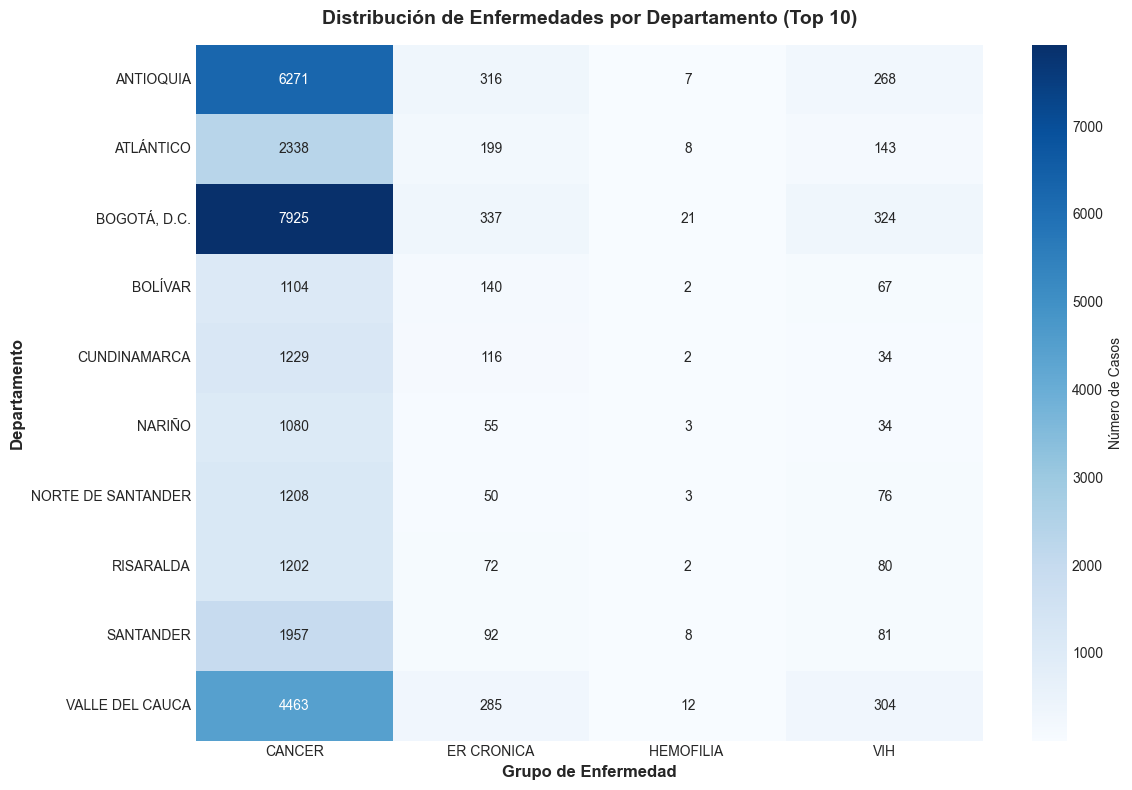

In [27]:
# Top 10 departamentos por cada grupo
print("\n  DISTRIBUCIÓN GEOGRÁFICA POR GRUPO DE ENFERMEDAD:")
print("=" * 80)

for grupo in df['GRUPO'].unique():
    print(f"\n{grupo}:")
    top_deptos_grupo = df[df['GRUPO'] == grupo]['Nom Dep'].value_counts().head(5)
    print(top_deptos_grupo)

# Visualización: Heatmap de top 10 departamentos vs grupos
top10_deptos = df['Nom Dep'].value_counts().head(10).index
df_top10 = df[df['Nom Dep'].isin(top10_deptos)]
tabla_depto_grupo = pd.crosstab(df_top10['Nom Dep'], df_top10['GRUPO'])

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(tabla_depto_grupo, annot=True, fmt='d', cmap='Blues', ax=ax, cbar_kws={'label': 'Número de Casos'})
ax.set_title('Distribución de Enfermedades por Departamento (Top 10)', fontweight='bold', fontsize=14, pad=15)
ax.set_xlabel('Grupo de Enfermedad', fontweight='bold', fontsize=12)
ax.set_ylabel('Departamento', fontweight='bold', fontsize=12)
plt.tight_layout()
plt.show()

## 9. IDENTIFICACIÓN DE VARIABLES A ELIMINAR

### ANÁLISIS Y JUSTIFICACIÓN:

Basándose en el análisis exploratorio, las siguientes variables deben ser eliminadas o transformadas:

In [28]:
print("\n  VARIABLES A ELIMINAR Y JUSTIFICACIÓN:")
print("=" * 80)

variables_eliminar = {
    'SIMUERTEPO': '99.92% de valores nulos - No aporta información',
    'COD_DPTO': 'Redundante - tenemos Nom Dep (nombre del departamento)',
    'COD_MUNIC': 'Demasiados valores únicos - baja utilidad predictiva',
    'A_DEFUN': 'Código administrativo - no relevante para predicción',
    'TIPO_DEFUN': 'Todos los valores son iguales (2) - varianza cero',
    'ANO': 'Todos los valores son 2019 - varianza cero',
    'HORA': 'Hora de defunción - no relevante para el tipo de enfermedad',
    'MINUTOS': 'Minutos de defunción - no relevante para el tipo de enfermedad',
    'OCUPACION': '0.73% nulos y muchas categorías - baja calidad',
    'CAUSA_MULT': 'Texto libre - requiere procesamiento NLP complejo',
    'C_BAS1': 'Redundante - tenemos NOMBRE CIE-10',
    'NOMBRE CIE-10': 'Redundante - tenemos CUENTA DE ALTO COSTO',
    'CUENTA DE ALTO COSTO': 'Es la descripción de la enfermedad - eliminar para evitar data leakage',
    'CAUSA_667': 'Código no documentado - significado desconocido',
    'CAU_HOMOL': 'Código no documentado - significado desconocido',
    'CODPRES': 'Código de prestador - alta cardinalidad, baja utilidad',
    'CODPTORE': 'Código de municipio de residencia - redundante con CODMUNRE',
    'CODMUNRE': 'Alta cardinalidad - podemos usar departamento',
    'ULTCURFAL': 'Último curso fallido - muchos valores 99 (no especificado)',
    'MUERTEPORO': 'Tipo de muerte por otra causa - no relevante',
    'IDPERTET': 'Identificador de pertenencia étnica - considerar por discriminación',
    'IDPROFCER': 'Identificador de profesional certificador - no relevante'
}

for var, justificacion in variables_eliminar.items():
    print(f"\n• {var}:")
    print(f"  └─ {justificacion}")

print("\n" + "=" * 80)
print("\n VARIABLES A CONSERVAR PARA MODELADO:")
print("=" * 80)

variables_mantener = [
    'SEXO',           # Sexo del fallecido
    'EST_CIVIL',      # Estado civil
    'GRU_ED1',        # Grupo de edad detallado (quinquenal)
    'GRU_ED2',        # Grupo de edad amplio
    'NIVEL_EDU',      # Nivel educativo
    'AREA_RES',       # Área de residencia (urbano/rural)
    'SEG_SOCIAL',     # Régimen de seguridad social
    'IDADMISALUD',    # Administradora de salud
    'P_PMAN_IRIS',    # Probable manera de muerte
    'CONS_EXP',       # Certificado expedido por
    'ASIS_MED',       # Asistencia médica
    'MES',            # Mes de defunción
    'SIT_DEFUN',      # Sitio de defunción
    'Nom Dep',        # Departamento
    'GRUPO'           # Variable objetivo
]

for var in variables_mantener:
    print(f"• {var}")

print(f"\n Total de variables a utilizar: {len(variables_mantener)} (incluida variable objetivo)")
print(f" Variables predictoras: {len(variables_mantener) - 1}")


  VARIABLES A ELIMINAR Y JUSTIFICACIÓN:

• SIMUERTEPO:
  └─ 99.92% de valores nulos - No aporta información

• COD_DPTO:
  └─ Redundante - tenemos Nom Dep (nombre del departamento)

• COD_MUNIC:
  └─ Demasiados valores únicos - baja utilidad predictiva

• A_DEFUN:
  └─ Código administrativo - no relevante para predicción

• TIPO_DEFUN:
  └─ Todos los valores son iguales (2) - varianza cero

• ANO:
  └─ Todos los valores son 2019 - varianza cero

• HORA:
  └─ Hora de defunción - no relevante para el tipo de enfermedad

• MINUTOS:
  └─ Minutos de defunción - no relevante para el tipo de enfermedad

• OCUPACION:
  └─ 0.73% nulos y muchas categorías - baja calidad

• CAUSA_MULT:
  └─ Texto libre - requiere procesamiento NLP complejo

• C_BAS1:
  └─ Redundante - tenemos NOMBRE CIE-10

• NOMBRE CIE-10:
  └─ Redundante - tenemos CUENTA DE ALTO COSTO

• CUENTA DE ALTO COSTO:
  └─ Es la descripción de la enfermedad - eliminar para evitar data leakage

• CAUSA_667:
  └─ Código no documentado - 

## 10. GUARDAR DATASET LIMPIO

Guardamos el dataset con las variables seleccionadas y las transformaciones descriptivas.

In [29]:
# Crear dataset limpio con variables seleccionadas
df_limpio = df[variables_mantener].copy()

# Guardar
df_limpio.to_csv('datos_limpios_eda.csv', index=False)

print("\n Dataset limpio guardado: 'datos_limpios_eda.csv'")
print(f" Dimensiones finales: {df_limpio.shape[0]:,} filas x {df_limpio.shape[1]} columnas")
print(f" Variables predictoras: {df_limpio.shape[1] - 1}")
print(f" Variable objetivo: GRUPO")


 Dataset limpio guardado: 'datos_limpios_eda.csv'
 Dimensiones finales: 42,644 filas x 15 columnas
 Variables predictoras: 14
 Variable objetivo: GRUPO


## 11. CONCLUSIONES DEL ANÁLISIS EXPLORATORIO

---

### HALLAZGOS PRINCIPALES:

#### 1. Variable Objetivo (GRUPO):
- **DESBALANCE CRÍTICO**: CANCER representa 89.18% de los casos
- ER CRONICA: 6.06%, VIH: 4.54%, HEMOFILIA: 0.22%
- **Implicación**: Requerirá técnicas de balanceo obligatorias (SMOTE, SMOTEENN)

#### 2. Características Demográficas:
- Distribución equitativa entre sexos (51.3% mujeres, 48.7% hombres)
- **Concentración etaria**: 57.4% de casos en personas de 65+ años
- Alta mortalidad en grupo 45-64 años (29.8%)
- **Geografía**: Bogotá (20.2%), Antioquia (16.1%), Valle (11.9%)

#### 3. Seguridad Social:
- Régimen Subsidiado: 48.5%
- Régimen Contributivo: 44.3%
- Refleja cobertura universal del sistema colombiano

#### 4. Enfermedades Específicas:
- Tumores digestivos (estómago, colon) lideran mortalidad
- Cáncer de pulmón y mama en top 3
- Insuficiencia renal crónica: principal causa no oncológica

#### 5. Calidad de Datos:
- Excelente calidad general (< 1% de nulos en mayoría de variables)
- Variable SIMUERTEPO inútil (99.92% nulos) → ELIMINAR
- Variables administrativas sin valor predictivo → ELIMINAR

---

### ESTRATEGIAS PARA EL MODELADO:

#### 1. Preprocesamiento Obligatorio:
- Eliminar 22 variables irrelevantes identificadas
- Mantener 14 variables predictoras clave
- Imputación simple para < 1% de nulos
- Codificación de variables categóricas

#### 2. Balanceo de Clases:
- **CRÍTICO**: Aplicar SMOTE o SMOTEENN
- Considerar undersampling de CANCER
- Evaluar con métricas balanceadas (F1-Score, Recall)

#### 3. Feature Engineering:
- Agrupar departamentos por regiones
- Simplificar niveles educativos
- Crear interacciones edad-sexo

#### 4. Validación:
- Stratified K-Fold por desbalance
- Enfocarse en precisión de clases minoritarias
- Matriz de confusión detallada

---

###   RIESGOS IDENTIFICADOS:
1. **Desbalance extremo**: Modelo podría ignorar clases minoritarias
2. **Sesgo geográfico**: Concentración en 3 departamentos
3. **Edad avanzada**: Poca variabilidad en grupos de edad
4. **Data leakage potencial**: Cuidado con variables diagnósticas
